# **Mounting Google Drive**

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import os
os.getcwd()

'/gdrive'

#### Move to the Dataset Dircetory in My Drive

In [3]:
os.chdir("/gdrive/MyDrive/Autism_code/Autism_Public_Folder/Kinematics")
!pwd

/gdrive/MyDrive/Autism_code/Autism_Public_Folder/Kinematics


In [4]:
# importing necessary packages
import matplotlib.pyplot as plt  # for making plots / graphs
import pandas as pd              # for reading the .csv file and related operations
import numpy as np               # for working with arrays (multi-dimensional)  

# read the dataset
df = pd.read_excel("./Kinematics_autism.xlsx")

# now, the whole dataset csv dataset file is saved into `df` variable.
print("df.shape = ", df.shape)
df.head(3)

df.shape =  (80, 182)


,TrialSerial,Group,Side,Hip Angle_X_HS,Hip Angle_X_MAX_ST,Hip Angle_X_MAX_ST_time,Hip Angle_X_MAX_SW,Hip Angle_X_MAX_SW_time,Hip Angle_X_MIN_ST,Hip Angle_X_MIN_ST_time,...,Sha_Foot_Angle_Z_MIN_ST,Sha_Foot_Angle_Z_MIN_ST_time,Sha_Foot_Angle_Z_MIN_SW,Sha_Foot_Angle_Z_MIN_SW_time,Sha_Foot_Angle_Z_ROM,Sha_Foot_Angle_Z_TO,Sha_Foot_Angle_Z_MAX,Sha_Foot_Angle_Z_MAX_time,Sha_Foot_Angle_Z_MIN,Sha_Foot_Angle_Z_MIN_time
0,A1,Autism,L,29.425,29.273,1.28210,32.156,91.026,-8.8573,48.718,...,-3.3221,10.2560,9.91310,85.897,37.230,32.3560,33.908,57.692,-3.3221,10.2560
1,A1,Autism,R,35.083,35.744,6.32910,37.724,92.405,-5.9612,51.899,...,-12.3070,12.6580,-0.14295,97.468,30.827,15.5390,18.521,60.759,-12.3070,12.6580
2,A10,Autism,L,37.093,38.020,0.69444,43.751,85.417,12.6970,56.250,...,-10.0840,9.7222,-4.27540,81.944,19.717,5.9317,9.633,66.667,-10.0840,9.7222


In [5]:
# print the columns of the data frame
df.columns

Index(['TrialSerial', 'Group', 'Side', 'Hip Angle_X_HS', 'Hip Angle_X_MAX_ST',
       'Hip Angle_X_MAX_ST_time', 'Hip Angle_X_MAX_SW',
       'Hip Angle_X_MAX_SW_time', 'Hip Angle_X_MIN_ST',
       'Hip Angle_X_MIN_ST_time',
       ...
       'Sha_Foot_Angle_Z_MIN_ST', 'Sha_Foot_Angle_Z_MIN_ST_time',
       'Sha_Foot_Angle_Z_MIN_SW', 'Sha_Foot_Angle_Z_MIN_SW_time',
       'Sha_Foot_Angle_Z_ROM', 'Sha_Foot_Angle_Z_TO', 'Sha_Foot_Angle_Z_MAX',
       'Sha_Foot_Angle_Z_MAX_time', 'Sha_Foot_Angle_Z_MIN',
       'Sha_Foot_Angle_Z_MIN_time'],
      dtype='object', length=182)

In [6]:
# Remove the Columns: ["TrialSerial", "Side"]- These columns were not needed.
df = df.drop(["TrialSerial", "Side"], axis=1)
print("df.shape = ", df.shape)
df.columns

df.shape =  (80, 180)


Index(['Group', 'Hip Angle_X_HS', 'Hip Angle_X_MAX_ST',
       'Hip Angle_X_MAX_ST_time', 'Hip Angle_X_MAX_SW',
       'Hip Angle_X_MAX_SW_time', 'Hip Angle_X_MIN_ST',
       'Hip Angle_X_MIN_ST_time', 'Hip Angle_X_MIN_SW',
       'Hip Angle_X_MIN_SW_time',
       ...
       'Sha_Foot_Angle_Z_MIN_ST', 'Sha_Foot_Angle_Z_MIN_ST_time',
       'Sha_Foot_Angle_Z_MIN_SW', 'Sha_Foot_Angle_Z_MIN_SW_time',
       'Sha_Foot_Angle_Z_ROM', 'Sha_Foot_Angle_Z_TO', 'Sha_Foot_Angle_Z_MAX',
       'Sha_Foot_Angle_Z_MAX_time', 'Sha_Foot_Angle_Z_MIN',
       'Sha_Foot_Angle_Z_MIN_time'],
      dtype='object', length=180)

### Label encode target variable - `y`

In [7]:
# First, look at the target variable
print(df.loc[:, "Group"].values.shape)
print(df.loc[:, "Group"].values)

(80,)
['Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism'
 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism'
 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism'
 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism'
 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Autism' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control' 'Control' 'Control'
 'Control' 'Control' 'Control' 'Control' 'Control']


In [8]:
# Perform Data Preprocessing
# Label Encoding the class variables 
# Here, we replace the "Control" and "Autism" keywords with 0 and 1 values, respectively.
df["Group"] = df["Group"].replace({'Control': 0, 'Autism': 1})
df.head(3)

,Group,Hip Angle_X_HS,Hip Angle_X_MAX_ST,Hip Angle_X_MAX_ST_time,Hip Angle_X_MAX_SW,Hip Angle_X_MAX_SW_time,Hip Angle_X_MIN_ST,Hip Angle_X_MIN_ST_time,Hip Angle_X_MIN_SW,Hip Angle_X_MIN_SW_time,...,Sha_Foot_Angle_Z_MIN_ST,Sha_Foot_Angle_Z_MIN_ST_time,Sha_Foot_Angle_Z_MIN_SW,Sha_Foot_Angle_Z_MIN_SW_time,Sha_Foot_Angle_Z_ROM,Sha_Foot_Angle_Z_TO,Sha_Foot_Angle_Z_MAX,Sha_Foot_Angle_Z_MAX_time,Sha_Foot_Angle_Z_MIN,Sha_Foot_Angle_Z_MIN_time
0,1,29.425,29.273,1.28210,32.156,91.026,-8.8573,48.718,-3.21980,57.692,...,-3.3221,10.2560,9.91310,85.897,37.230,32.3560,33.908,57.692,-3.3221,10.2560
1,1,35.083,35.744,6.32910,37.724,92.405,-5.9612,51.899,-0.73328,59.494,...,-12.3070,12.6580,-0.14295,97.468,30.827,15.5390,18.521,60.759,-12.3070,12.6580
2,1,37.093,38.020,0.69444,43.751,85.417,12.6970,56.250,19.84100,64.583,...,-10.0840,9.7222,-4.27540,81.944,19.717,5.9317,9.633,66.667,-10.0840,9.7222


In [9]:
# saving the target variables into `y` variable.
y = df.loc[:, "Group"].values
print("y.shape = ", y.shape)
print("y = ", y)

y.shape =  (80,)
y =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [10]:
# Perform Data Preprocessing- Data Standardization
# Defining a Standard Scaler for scaling the values in the dataset
# in the range of [-a, +a], i.e. scale values to a smaller range.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
df.shape

(80, 180)

In [12]:
# Define the different segments from dataset to be used.
segments = {
    'KINEMATICS': df.loc[:,'Hip Angle_X_HS':'Sha_Foot_Angle_Z_MIN_time']
# 'HIP' : df.loc[:, 'HIP Moment_X_MAX_ST' : 'HIP Power_X_MIN_ST_time..35.70.'],
    # 'ANKLE': df.loc[:, 'ANKLE Moment_X_MAX_ST..35.70.' : 'ANKLE Power_X_MAX_ST_time..35.70.']
#     'SSF_MSF_All' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Sha_Foot_Angle_Z_MIN_time'],
#     'Cal_Met_Angle' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Cal_Met_Angle_Z_MIN_time'],
#     'Cal_Mid_Angle' : df.loc[:, 'Cal_Mid_Angle_X_HS' : 'Cal_Mid_Angle_Z_MIN_time'],
}


In [13]:
print(segments["KINEMATICS"].shape)
segments["KINEMATICS"].head()

(80, 179)


,Hip Angle_X_HS,Hip Angle_X_MAX_ST,Hip Angle_X_MAX_ST_time,Hip Angle_X_MAX_SW,Hip Angle_X_MAX_SW_time,Hip Angle_X_MIN_ST,Hip Angle_X_MIN_ST_time,Hip Angle_X_MIN_SW,Hip Angle_X_MIN_SW_time,Hip Angle_X_ROM,...,Sha_Foot_Angle_Z_MIN_ST,Sha_Foot_Angle_Z_MIN_ST_time,Sha_Foot_Angle_Z_MIN_SW,Sha_Foot_Angle_Z_MIN_SW_time,Sha_Foot_Angle_Z_ROM,Sha_Foot_Angle_Z_TO,Sha_Foot_Angle_Z_MAX,Sha_Foot_Angle_Z_MAX_time,Sha_Foot_Angle_Z_MIN,Sha_Foot_Angle_Z_MIN_time
0,29.425,29.273,1.28210,32.156,91.026,-8.8573,48.718,-3.21980,57.692,41.014,...,-3.3221,10.2560,9.91310,85.897,37.230,32.3560,33.908,57.692,-3.3221,10.2560
1,35.083,35.744,6.32910,37.724,92.405,-5.9612,51.899,-0.73328,59.494,43.685,...,-12.3070,12.6580,-0.14295,97.468,30.827,15.5390,18.521,60.759,-12.3070,12.6580
2,37.093,38.020,0.69444,43.751,85.417,12.6970,56.250,19.84100,64.583,31.054,...,-10.0840,9.7222,-4.27540,81.944,19.717,5.9317,9.633,66.667,-10.0840,9.7222
3,37.516,38.203,0.72993,41.478,87.591,9.8888,58.394,17.21400,66.423,31.589,...,-3.2034,11.6790,1.27550,72.993,16.949,13.7460,13.746,65.693,-3.2034,11.6790
4,43.294,42.804,4.81930,53.676,85.542,-4.3180,51.807,2.27400,59.036,57.994,...,-6.4306,13.2530,-0.18051,83.133,23.905,13.8280,17.475,61.446,-6.4306,13.2530


In [14]:
segments["KINEMATICS"].columns

Index(['Hip Angle_X_HS', 'Hip Angle_X_MAX_ST', 'Hip Angle_X_MAX_ST_time',
       'Hip Angle_X_MAX_SW', 'Hip Angle_X_MAX_SW_time', 'Hip Angle_X_MIN_ST',
       'Hip Angle_X_MIN_ST_time', 'Hip Angle_X_MIN_SW',
       'Hip Angle_X_MIN_SW_time', 'Hip Angle_X_ROM',
       ...
       'Sha_Foot_Angle_Z_MIN_ST', 'Sha_Foot_Angle_Z_MIN_ST_time',
       'Sha_Foot_Angle_Z_MIN_SW', 'Sha_Foot_Angle_Z_MIN_SW_time',
       'Sha_Foot_Angle_Z_ROM', 'Sha_Foot_Angle_Z_TO', 'Sha_Foot_Angle_Z_MAX',
       'Sha_Foot_Angle_Z_MAX_time', 'Sha_Foot_Angle_Z_MIN',
       'Sha_Foot_Angle_Z_MIN_time'],
      dtype='object', length=179)

# Defining **Cross Validation** method to be used

In [15]:
# Define Leave-One-Out CV
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

# # Define Repeated Stratified k-fold CV
# from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
# rskf_cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=5, random_state=36851234)

# Defning the **Classifer** to be used

In [38]:
# Define the Classifier to be used for Sequential Feature Selection (SFS)

# # Apply Linear LDA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis(solver='svd', n_components=None)

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Define SVM classifier with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=90, verbose=False)


# Defining the **Feature Selection** algorithm to be used

In [39]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# Define the Sequential Feature Selection class
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

# Below is the code for applying Forward Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator=svm, 
            k_features=(1,15),
            forward=True, floating=False,
            verbose=2,
            scoring=('accuracy'),
            cv=loocv,
            n_jobs=-1)

# **Hyper-Parameter Optimization** for Non-Linear SVC (RBF)

In [41]:
# Define the Classifier and Parameter Grid to be used for GridSearch and final Evaluation
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC
svm_classifier = SVC()

param_grid = [
              {'C': [0.01, 0.1, 0, 0.5, 1, 2, 3, 5, 8, 20, 50, 90], 
               'gamma': ['scale', 'auto', 0.01, 0.03, 0.04, 0.043, 0.045, 0.048, 0.05, 0.053, 0.055, 0.058, 0.06, 0.08, 0.0001, 0.001, 0.1, 1, 10], 
               'tol':[1e-2, 1e-3, 1e-4, 1e-5], 
               'kernel': ['rbf']}, #rbfSVM
]

:### Change the `estimator` in GridSearch to the estimator you are using.

In [42]:
# Define Grid Search class
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=svm_classifier, 
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=loocv, # uses Leave One Out CV
                          refit=True, verbose=1)

# Main Driver Code: **Non Linear SVM (RBF)**

In [43]:
# Type the name of the Algorithm that you are using
# This will be used while Writing the Scores in .txt file
# LDA, LinearSVM, SVM (RBF), SVM (polynomial), LogisticRegression, RandomForest
algorith_you_are_using = 'SVM (RBF)' 

In [22]:
'''svm = SVC(kernel='rbf', verbose=False, C=1)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Apply Standard Scaler
  print("X.shape = ", X.shape)

  # Apply Sequetial Forward Feature Selection (SFS)
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  print("\nsfs.k_score_ = ", sfs.k_score_)
  print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Parameters
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)
  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])
  print("\n##############################################################\n")

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))

  print("\n##############################################################")


Running:  KINEMATICS
X.shape =  (80, 179)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   20.4s finished

[2022-09-09 13:39:12] Features: 1/179 -- score: 0.7[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 175 out of 178 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   11.3s finished

[2022-09-09 13:39:23] Features: 2/179 -- score: 0.7875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 174 out of 177 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   11.3s finished

[2022-09-09 13:39:34] Features: 3/179 -- 


sfs.k_score_ =  0.925
sfs.k_feature_idx_ =  (5, 35, 40, 51, 90, 97, 100, 125, 134)
[After SFS] X.shape =  (80, 9)
Fitting 80 folds for each of 912 candidates, totalling 72960 fits
best_classifier =  SVC(C=1, tol=0.01)

##############################################################

SVM (RBF), KINEMATICS, 0.925, 0.905, 0.947, 0.950, 0.900, 9.947, 0.923, 0.851

##############################################################


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6080 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx",

In [30]:
'''svm = SVC(kernel='rbf', C=30, verbose=False)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Apply Standard Scaler
  print("X.shape = ", X.shape)

  # Apply Sequetial Forward Feature Selection (SFS)
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  print("\nsfs.k_score_ = ", sfs.k_score_)
  print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Parameters
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)
  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])
  print("\n##############################################################\n")

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))

  print("\n##############################################################")


Running:  KINEMATICS
X.shape =  (80, 179)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   26.2s finished

[2022-09-09 14:02:51] Features: 1/179 -- score: 0.725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   15.8s finished

[2022-09-09 14:03:07] Features: 2/179 -- score: 0.7625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 174 out of 177 | elapsed:   15.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   15.6s finished

[2022-09-09 14:03:23] Features: 3/179 -- score: 0.7625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent


sfs.k_score_ =  0.925
sfs.k_feature_idx_ =  (1, 7, 9, 11, 29, 51, 71, 73, 75, 143, 154, 173)
[After SFS] X.shape =  (80, 12)
Fitting 80 folds for each of 912 candidates, totalling 72960 fits
best_classifier =  SVC(C=8, tol=0.01)

##############################################################

SVM (RBF), KINEMATICS, 0.925, 0.976, 0.868, 0.891, 0.971, 36.474, 0.917, 0.853

##############################################################


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6080 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx",

In [37]:
'''svm = SVC(kernel='rbf', C=60, verbose=False)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Apply Standard Scaler
  print("X.shape = ", X.shape)

  # Apply Sequetial Forward Feature Selection (SFS)
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  print("\nsfs.k_score_ = ", sfs.k_score_)
  print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Parameters
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)
  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])
  print("\n##############################################################\n")

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))

  print("\n##############################################################")


Running:  KINEMATICS
X.shape =  (80, 179)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   22.2s finished

[2022-09-09 14:27:12] Features: 1/179 -- score: 0.725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   14.4s finished

[2022-09-09 14:27:26] Features: 2/179 -- score: 0.725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 174 out of 177 | elapsed:   14.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   15.0s finished

[2022-09-09 14:27:41] Features: 3/179 -- score: 0.825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed: 


sfs.k_score_ =  0.9625
sfs.k_feature_idx_ =  (0, 1, 3, 4, 5, 9, 11, 14, 20, 24, 25, 26, 27, 28, 30, 33, 38, 43, 44, 46, 51, 52, 57, 58, 62, 66, 67, 69, 71, 72, 73, 76, 83, 86, 88, 91, 92, 97, 99, 100, 102, 103, 104, 106, 109, 119, 121, 123, 130, 132, 134, 138, 155, 170, 171)
[After SFS] X.shape =  (80, 55)
Fitting 80 folds for each of 912 candidates, totalling 72960 fits
best_classifier =  SVC(C=5, tol=0.01)

##############################################################

SVM (RBF), KINEMATICS, 0.963, 1.000, 0.921, 0.933, 1.000, 0.921, 0.959, 0.927

##############################################################


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6080 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx",

In [44]:
'''svm = SVC(kernel='rbf', verbose=False, C=90)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Apply Standard Scaler
  print("X.shape = ", X.shape)

  # Apply Sequetial Forward Feature Selection (SFS)
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  print("\nsfs.k_score_ = ", sfs.k_score_)
  print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Parameters
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)
  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])
  print("\n##############################################################\n")

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))

  print("\n##############################################################")


Running:  KINEMATICS
X.shape =  (80, 179)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 179 out of 179 | elapsed:   23.4s finished

[2022-09-09 14:51:33] Features: 1/179 -- score: 0.725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 178 out of 178 | elapsed:   16.7s finished

[2022-09-09 14:51:50] Features: 2/179 -- score: 0.725[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 174 out of 177 | elapsed:   16.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 177 out of 177 | elapsed:   16.6s finished

[2022-09-09 14:52:07] Features: 3/179 -- score: 0.6875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent 


sfs.k_score_ =  0.925
sfs.k_feature_idx_ =  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 20, 24, 28, 33, 36, 38, 39, 40, 44, 51, 55, 60, 66, 67, 69, 71, 73, 74, 76, 85, 88, 89, 92, 97, 124, 128, 139, 145, 156, 173)
[After SFS] X.shape =  (80, 44)
Fitting 80 folds for each of 912 candidates, totalling 72960 fits
best_classifier =  SVC(C=8, tol=0.01)

##############################################################

SVM (RBF), KINEMATICS, 0.925, 0.952, 0.895, 0.909, 0.944, 18.789, 0.919, 0.850

##############################################################


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6080 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx",

# **Verification**

In [46]:
# get the names of the feature subset selected using the Feature Selection algorithm.
sfs_feature_idx = [0, 1, 3, 4, 5, 9, 11, 14, 20, 24, 25, 26, 27, 28, 30, 33, 38, 43, 44, 46, 51, 52, 57, 58, 62, 66, 67, 69, 71, 72, 73, 76, 83, 86, 88, 91, 92, 97, 99, 100, 102, 103, 104, 106, 109, 119, 121, 123, 130, 132, 134, 138, 155, 170, 171]
print("Number of Features selected: ", len(sfs_feature_idx))

segments["KINEMATICS"].iloc[:, sfs_feature_idx].head()

Number of Features selected:  55


,Hip Angle_X_HS,Hip Angle_X_MAX_ST,Hip Angle_X_MAX_SW,Hip Angle_X_MAX_SW_time,Hip Angle_X_MIN_ST,Hip Angle_X_ROM,Hip Angle_Y_HS,Hip Angle_Y_MAX_SW,Hip Angle_Y_ROM,Hip Angle_Z_MAX_ST_time,...,Trunk_Angles_Y_ROM,Trunk_Angles_Z_HS,Trunk_Angles_Z_MAX_ST_time,Trunk_Angles_Z_ROM,Sha_Foot_Angle_X_HS,Sha_Foot_Angle_X_MAX_ST_time,Sha_Foot_Angle_X_MIN_ST_time,Sha_Foot_Angle_Y_MIN_ST_time,Sha_Foot_Angle_Z_MIN_ST_time,Sha_Foot_Angle_Z_MIN_SW
0,29.425,29.273,32.156,91.026,-8.8573,41.014,-1.15310,0.93515,11.425,11.53800,...,6.8778,-4.1271,52.564,11.3690,-0.20682,29.487,56.4100,30.7690,10.2560,9.91310
1,35.083,35.744,37.724,92.405,-5.9612,43.685,8.85410,8.35390,13.129,51.89900,...,5.8725,-5.0853,51.899,9.1084,2.37690,34.177,58.2280,15.1900,12.6580,-0.14295
2,37.093,38.020,43.751,85.417,12.6970,31.054,0.89604,1.38950,11.472,0.69444,...,5.4877,-3.8192,63.889,10.3300,-12.58900,53.472,4.8611,25.6940,9.7222,-4.27540
3,37.516,38.203,41.478,87.591,9.8888,31.589,-1.24410,-1.32130,12.865,8.75910,...,7.1377,-3.3542,63.504,12.0800,-3.89350,54.745,6.5693,3.6496,11.6790,1.27550
4,43.294,42.804,53.676,85.542,-4.3180,57.994,-4.76480,-6.19050,20.351,42.16900,...,11.4010,-11.4770,57.831,29.1410,-2.82160,20.482,57.8310,9.6386,13.2530,-0.18051


In [47]:
temp = pd.DataFrame(segments["KINEMATICS"].keys().to_numpy(), columns=["FeatureNames"])

features = temp.iloc[sfs_feature_idx]
features

,FeatureNames
0,Hip Angle_X_HS
1,Hip Angle_X_MAX_ST
3,Hip Angle_X_MAX_SW
4,Hip Angle_X_MAX_SW_time
5,Hip Angle_X_MIN_ST
9,Hip Angle_X_ROM
11,Hip Angle_Y_HS
14,Hip Angle_Y_MAX_SW
20,Hip Angle_Y_ROM
24,Hip Angle_Z_MAX_ST_time


In [48]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.iloc[:, sfs_feature_idx].values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("\n##############################################################\n")

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))

  print("\n##############################################################")

Running:  KINEMATICS
X.shape =  (80, 55)
Fitting 80 folds for each of 912 candidates, totalling 72960 fits
best_classifier =  SVC(C=5, tol=0.01)

##############################################################

SVM (RBF), KINEMATICS, 0.963, 1.000, 0.921, 0.933, 1.000, 0.921, 0.959, 0.927

##############################################################


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6080 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx",

In [49]:
search_results.best_params_

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.01}

In [50]:
search_results.best_score_

0.9625

In [ ]:
##############################################################################
//////////////////////////////////////////////////////////////////////////////
##############################################################################

# Abi Deepak Old Code

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_excel("Kinetics_autism.xlsx")

In [ ]:
#Hip
result = df.iloc[:, 7:23]
result

,HIP Moment_X_MAX_ST,HIP Moment_X_MAX_ST_time,HIP Moment_X_MAX_SW,HIP Moment_X_MAX_SW_time,HIP Moment_X_MIN_ST..35.70.,HIP Moment_X_MIN_ST_time..35.70.,HIP Moment_Y_MAX_ST..12.35.,HIP Moment_Y_MAX_ST..35.70.,HIP Moment_Y_MAX_ST_time..12.35.,HIP Moment_Y_MAX_ST_time..35.70.,HIP Power_X_MAX_ST..12.35.,HIP Power_X_MAX_ST..35.70.,HIP Power_X_MAX_ST_time..12.35.,HIP Power_X_MAX_ST_time..35.70.,HIP Power_X_MIN_ST..35.70.,HIP Power_X_MIN_ST_time..35.70.
0,1.00660,3.8462,0.46200,100.000,-0.78580,50.000,0.55173,0.40427,14.103,46.154,0.968300,1.39240,17.949,52.564,-1.11440,42.308
1,1.01450,6.3291,0.43650,98.734,-0.65773,53.165,0.91142,0.52996,15.190,46.835,1.580600,1.21230,20.253,64.557,-0.71414,46.835
2,0.18686,3.4722,0.12366,96.528,-0.26492,53.472,0.55009,0.60442,23.611,48.611,0.095464,0.31568,18.056,56.250,-0.11042,35.417
3,0.18748,4.3796,0.15365,96.350,-0.26602,57.664,0.68194,0.72235,24.088,49.635,0.143060,0.54681,27.007,57.664,-0.19734,43.796
4,0.61430,6.0241,0.28402,89.157,-0.65771,50.602,0.71852,0.44006,14.458,40.964,0.593700,1.21100,25.301,55.422,-0.59512,42.169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.65602,6.1224,0.44253,94.898,-0.60137,53.061,1.03690,0.74349,14.286,47.959,0.977600,0.79428,17.347,55.102,-0.52851,41.837
76,0.72177,5.4348,0.47883,97.826,-0.82685,51.087,0.90151,0.17790,14.130,43.478,0.263890,1.11850,21.739,63.043,-0.72235,42.391
77,0.73759,4.4444,0.40433,97.778,-1.11110,52.222,0.91317,0.63006,15.556,46.667,-0.046496,1.42300,34.444,55.556,-1.08230,44.444
78,0.73249,6.7416,0.22305,95.506,-0.49430,50.562,0.88227,0.31485,14.607,46.067,1.214100,1.02470,17.978,53.933,-0.47840,38.202


In [ ]:
y=df.iloc[:,1]
y

0      Autism
1      Autism
2      Autism
3      Autism
4      Autism
       ...   
75    Control
76    Control
77    Control
78    Control
79    Control
Name: Group, Length: 80, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print("y.shape = ", y.shape)
print(type(y))
print(y)

y.shape =  (80,)
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
cols=result.columns
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(result), columns=cols)

In [ ]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', verbose=False, C=90)

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Define the Sequential Feature Selection class
# Below is the code for applying Forward Feature Selection
# Forward SFS
# Backward SFS
# Bi-Directional SFS
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(estimator=svm, 
            k_features=(1, 15),
            forward=True, floating=False,
            verbose=2,
            scoring=('accuracy'),
            cv=loocv,
            n_jobs=-1)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()

# # Define the Hyper-Parameters on which GridSearch needs to be done
# C = [1.0, 1.5, 2.0, 2.5, 3.0]
# kernel = ['poly', 'rbf', 'sigmoid']
# degree = [2,3,4,5]
# tol = [1e-2, 1e-3, 1e-4, 1e-5]

# param_grid = dict(C=C, kernel=kernel, degree=degree, tol=tol)

param_grid = [
              {'C': [0.001, 0.2, 0.3, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 5, 8, 90], 
               'gamma': ['scale', 'auto', 0.01, 0.03, 0.04, 0.043, 0.045, 0.048, 0.05, 0.053, 0.055, 0.058, 0.06, 0.08, 0.0001, 0.001, 0.1, 1, 10], 
               'tol':[1e-2, 1e-3, 1e-4, 1e-5], 
               'kernel': ['rbf']
              }#rbfSVM
]

In [ ]:
from sklearn.model_selection import GridSearchCV
gridSearch = GridSearchCV(estimator=svm, 
                          param_grid=param_grid, 
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=loocv, # uses Leave One Out CV
                          refit=True, verbose=1)

In [ ]:
algorith_you_are_using = 'NonLinear SVM (RBF)' 

In [ ]:
segments = {
    'Hip' : result
#     'Cal_Met_Angle' : df.loc[:, 'Cal_Met_Angle_X_HS' : 'Cal_Met_Angle_Z_MIN_time'],
#     'Cal_Mid_Angle' : df.loc[:, 'Cal_Mid_Angle_X_HS' : 'Cal_Mid_Angle_Z_MIN_time'],
#     'Mid_Met_Angle' : df.loc[:, 'Mid_Met_Angle_X_HS' : 'Mid_Met_Angle_Z_MIN_time'],
#     'Sha_Cal_Angle' : df.loc[:, 'Sha_Cal_Angle_X_HS' : 'Sha_Cal_Angle_Z_MIN_time'],
#     'Sha_Foot_Angle' : df.loc[:, 'Sha_Foot_Angle_X_HS' : 'Sha_Foot_Angle_Z_MIN_time']
}

In [ ]:
'''svm = SVC(kernel='rbf', verbose=False, C=60)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Hip
X.shape =  (80, 16)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.5s finished

[2022-08-25 23:17:52] Features: 1/16 -- score: 0.6375[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.6s finished

[2022-08-25 23:17:57] Features: 2/16 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.3s finished

[2022-08-25 23:17:59] Features: 3/16 -- score: 0.6875[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.2s finished

[2022-08-25 23:18:01] Features: 4/16 -- score: 0.6625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.1s finished

[2022-08-25 23:18:03] Features: 5/16 -- score: 0.6

[After SFS] X.shape =  (80, 10)
Fitting 80 folds for each of 988 candidates, totalling 79040 fits
best_classifier =  SVC(C=90, tol=0.01)
NonLinear SVM (RBF), Hip, 0.838, 0.842, 0.833, 0.821, 0.854, 5.278, 0.843, 0.675

##############################################################


In [ ]:
'''svm = SVC(kernel='rbf', verbose=False, C=90)'''
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

# current_dt = datetime.datetime.now(pytz.timezone('Asia/Calcutta'))
# date_time_str =  str(current_dt.day) + "_" + str(current_dt.month) + "_" + str(current_dt.year) + "_" + str(current_dt.hour) + "_" + str(current_dt.minute)

# Automatically Writing the results into the below text file
# file = open("./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt", "a")
# print("File Name: " + "./new_07_08/" + date_time_str + "_results_" + algorith_you_are_using + ".txt")
# file.write("Forward-SFS ({}, LOOCV, Accuracy) + GridSearch ({}, LOOCV, Accuracy)\n\n".format(algorith_you_are_using, algorith_you_are_using))
# file.write("Algorithm, Segment, Accuracy, Specificity, Sensitivity, NPV, PPV, Likelihood Ratio, F1, MCC\n")
# file.write("svm = SVC(kernel='rbf', verbose=False, C=90)")

for (key, value) in segments.items():
  print("Running: ", key)

  X = value.values
  X = sc.fit_transform(X) # Standard Scaler
  print("X.shape = ", X.shape)

  # Apply SFS
  sfs.k_features = (1, X.shape[1])
  sfs.fit(X, y)
  #print("sfs.k_score_ = ", sfs.k_score_)
  #print("sfs.k_feature_idx_ = ", sfs.k_feature_idx_)
  
  # Apply Grid Search on the Most Significant Features
  X = sfs.transform(X)
  print("[After SFS] X.shape = ", X.shape)

  search_results = gridSearch.fit(X, y)
  
  # Get the Best Classfier (Best Parameters) after Grid Search
  best_classifier = search_results.best_estimator_
  print("best_classifier = ", best_classifier)
  
  # Apply LOOCV to get classification scores
  y_true_list, y_pred_list = [], []
  for train_idx, test_idx in loocv.split(X, y):
      x_train, y_train = X[train_idx], y[train_idx]
      x_test, y_test = X[test_idx], y[test_idx]
      
      best_classifier.fit(x_train, y_train)
      
      y_pred = best_classifier.predict(x_test)

      y_true_list.append(y_test[:])
      y_pred_list.append(y_pred[:])

  print("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
                                                                                          key, 
                                                                                          accuracy_score(y_true_list, y_pred_list),
                                                                                          get_specificity(y_true_list, y_pred_list),
                                                                                          get_sensitivity(y_true_list, y_pred_list),
                                                                                          get_NPV(y_true_list, y_pred_list),
                                                                                          get_PPV(y_true_list, y_pred_list),
                                                                                          get_PLR(y_true_list, y_pred_list),
                                                                                          f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                          get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                          ))
  # file.write("{}, {}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(algorith_you_are_using, 
  #                                                                                             key, 
  #                                                                                             accuracy_score(y_true_list, y_pred_list),
  #                                                                                             get_specificity(y_true_list, y_pred_list),
  #                                                                                             get_sensitivity(y_true_list, y_pred_list),
  #                                                                                             get_NPV(y_true_list, y_pred_list),
  #                                                                                             get_PPV(y_true_list, y_pred_list),
  #                                                                                             get_PLR(y_true_list, y_pred_list),
  #                                                                                             f1_score(y_true_list, y_pred_list, labels=[0, 1]),
  #                                                                                             get_MCC(y_true_list, y_pred_list)                                                                                               
  #                                                                                              ))
  # clear the writing buffer
  # file.flush()
  print("##############################################################")

# file.close()

Running:  Hip
X.shape =  (80, 16)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    4.4s finished

[2022-08-25 23:21:35] Features: 1/16 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.0s finished

[2022-08-25 23:21:40] Features: 2/16 -- score: 0.65[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    5.2s finished

[2022-08-25 23:21:45] Features: 3/16 -- score: 0.6625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    4.9s finished

[2022-08-25 23:21:50] Features: 4/16 -- score: 0.6625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.0s finished

[2022-08-25 23:21:54] Features: 5/16 -- score: 0.65[

[After SFS] X.shape =  (80, 10)
Fitting 80 folds for each of 988 candidates, totalling 79040 fits
best_classifier =  SVC(C=90, tol=0.01)
NonLinear SVM (RBF), Hip, 0.838, 0.842, 0.833, 0.821, 0.854, 5.278, 0.843, 0.675

##############################################################


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from utils import *

X = df1.values
X = sc.fit_transform(X) # Standard Scaler

print("X.shape = ", X.shape)
print("y.shape = ", y.shape)

NameError: ignored

In [ ]:
# define the classifier
svm = SVC(kernel='rbf', verbose=False, C=90,probability=True)

# fit the classifier
# svm.fit(x_train, y_train)

In [ ]:
y_true_list, y_pred_list = [], []
for train_idx, test_idx in loocv.split(X, y):
    x_train, y_train = X[train_idx], y[train_idx]
    x_test, y_test = X[test_idx], y[test_idx]
    
    svm.fit(x_train, y_train)
    
    y_pred = svm.predict(x_test)

    y_true_list.append(y_test[:])
    y_pred_list.append(y_pred[:])

print("{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}\n".format(
                                                                                        accuracy_score(y_true_list, y_pred_list),
                                                                                        get_specificity(y_true_list, y_pred_list),
                                                                                        get_sensitivity(y_true_list, y_pred_list),
                                                                                        get_NPV(y_true_list, y_pred_list),
                                                                                        get_PPV(y_true_list, y_pred_list),
                                                                                        get_PLR(y_true_list, y_pred_list),
                                                                                        f1_score(y_true_list, y_pred_list, labels=[0, 1]),
                                                                                        get_MCC(y_true_list, y_pred_list)                                                                                               
                                                                                        ))

0.838, 0.842, 0.833, 0.821, 0.854, 5.278, 0.843, 0.675



In [ ]:
# split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (56, 10)
x_test.shape =  (24, 10)
y_train.shape =  (56,)
y_test.shape =  (24,)


In [ ]:
svm.score(x_test, y_test)

1.0

In [ ]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
import shap

  0%|          | 0/24 [00:00<?, ?it/s]

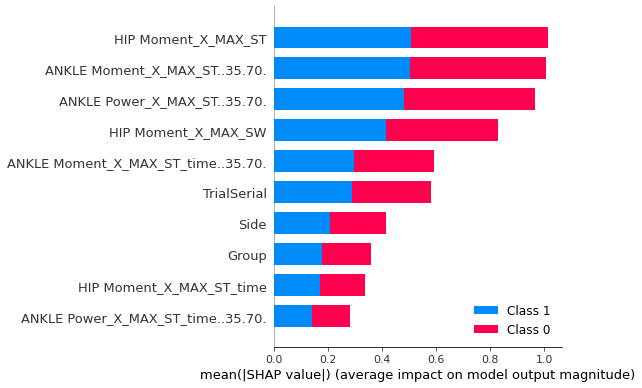

In [ ]:
explainer = shap.KernelExplainer(model=svm.predict_proba,data=x_train,link="logit")
shap_values = explainer.shap_values(x_test) 
shap.summary_plot(shap_values, x_train, feature_names=df.columns, plot_type="bar")